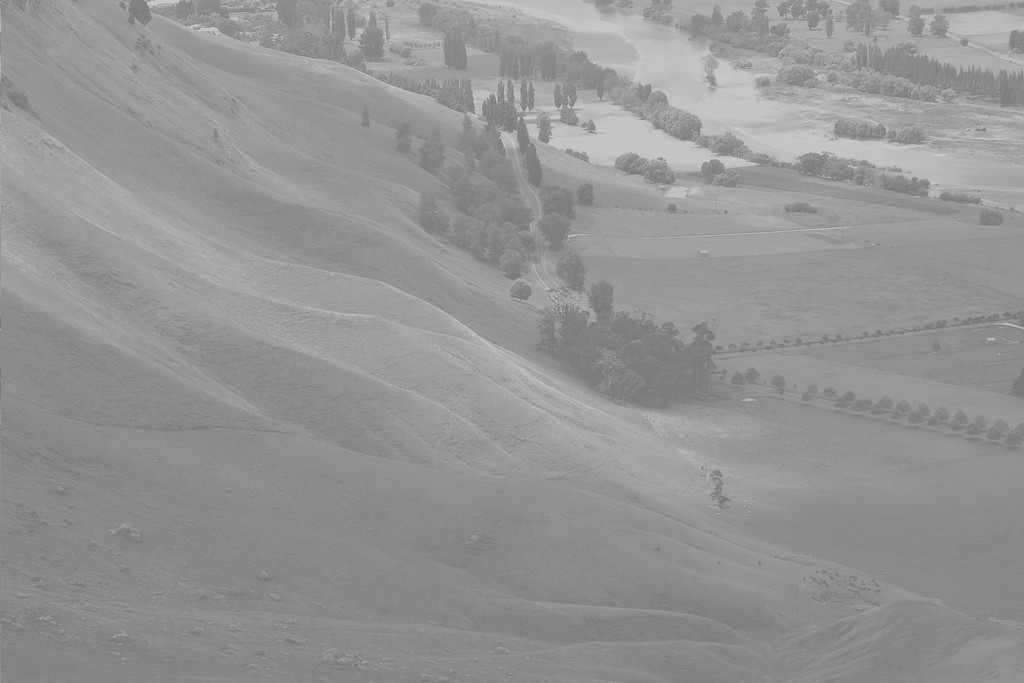

## Histgram Equalization

References:

Explain all details, concept and equations

Wikipedia: https://en.wikipedia.org/wiki/Histogram_equalization

Explain HE, pros and cons and another two improved HE algos

Blog: https://towardsdatascience.com/histogram-equalization-5d1013626e64

Implement the algos

Opencv:https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

### Numpy implementation

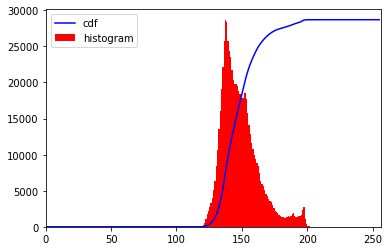

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/Unequalized_Hawkes_Bay_NZ.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

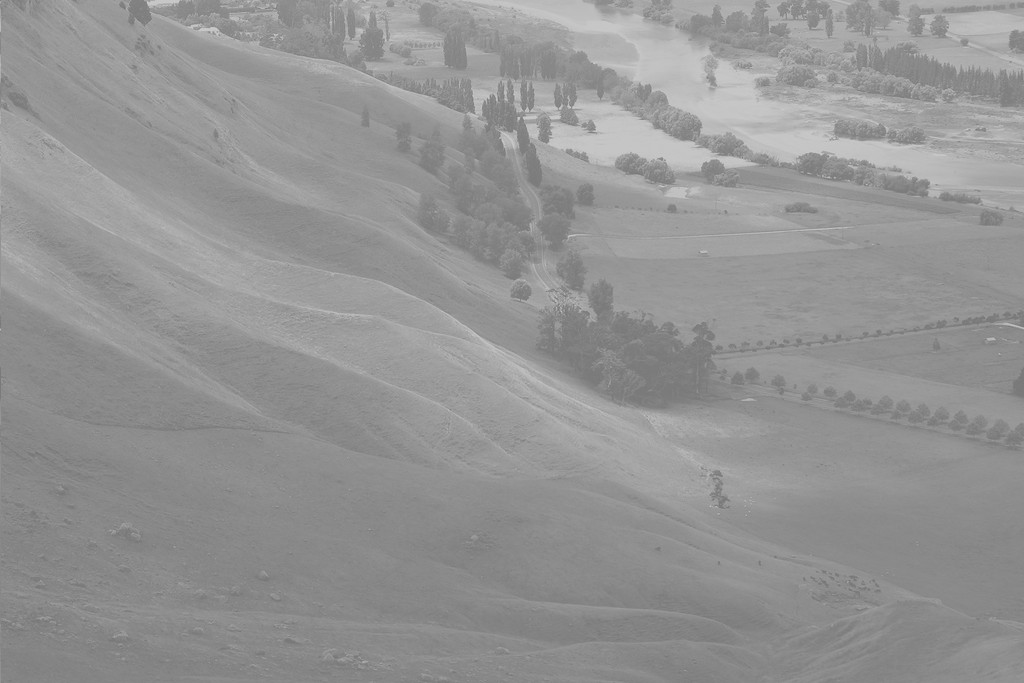

In [13]:
# colab plot img method
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [4]:
print(img)

[[127 145 149 ... 168 167 166]
 [165 152 143 ... 168 169 168]
 [171 145 140 ... 156 154 151]
 ...
 [147 132 134 ... 146 145 144]
 [146 130 132 ... 146 145 144]
 [145 128 129 ... 146 145 144]]


#### The masked array concept 

In [9]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [10]:
img2 = cdf[img]
cv2_imshow(img2)

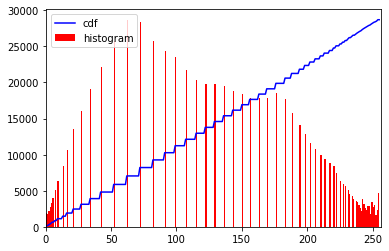

In [14]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

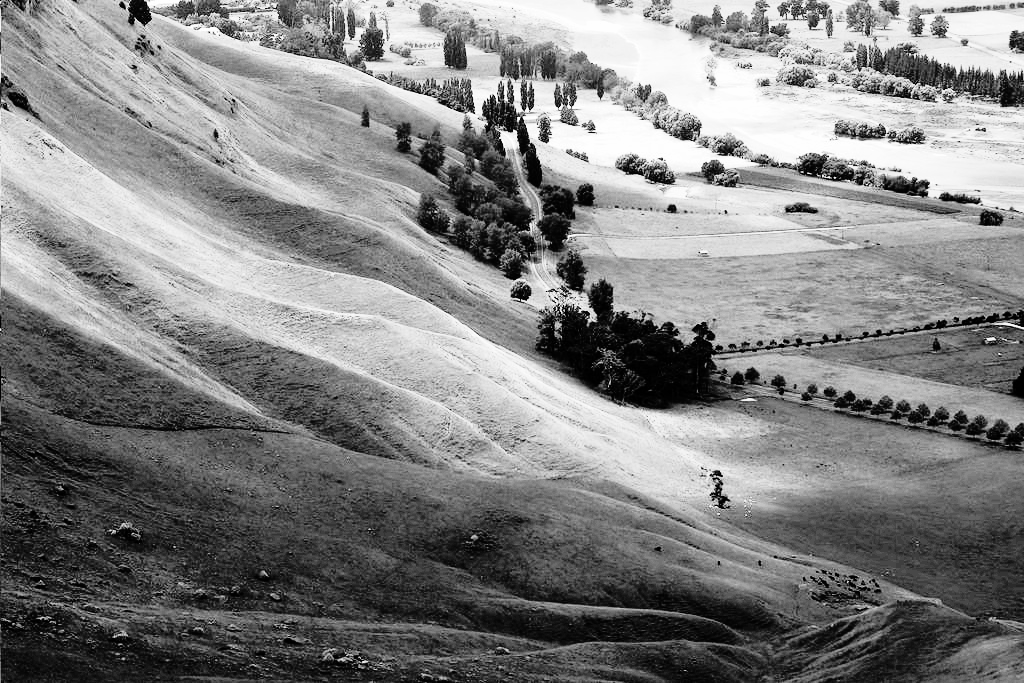

In [15]:
cv2_imshow(img2)

### Opencv

OpenCV has a function to do this, cv2.equalizeHist(). Its input is just grayscale image and output is our histogram equalized image.

In [20]:
img = cv2.imread('/content/Unequalized_Hawkes_Bay_NZ.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
#save the picture as png
#cv2.imwrite('res.png',res)

In [22]:
print(equ)

[[  6 130 157 ... 233 231 229]
 [227 177 115 ... 233 235 233]
 [237 130  91 ... 199 189 170]
 ...
 [144  22  35 ... 137 130 122]
 [137  13  22 ... 137 130 122]
 [130   8  10 ... 137 130 122]]


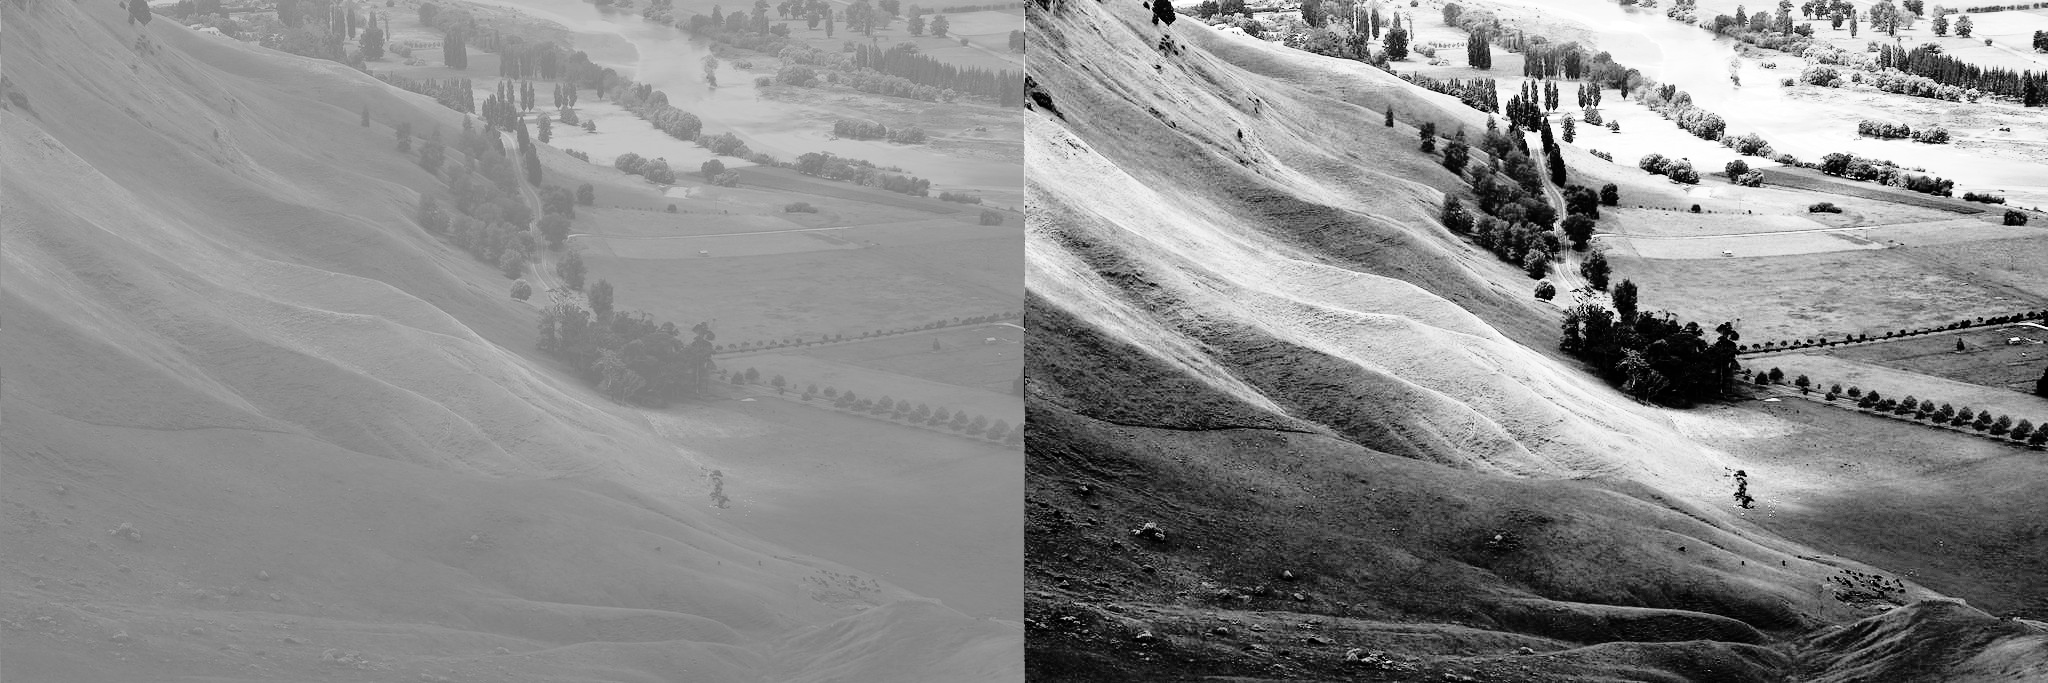

In [23]:
cv2_imshow(res)

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

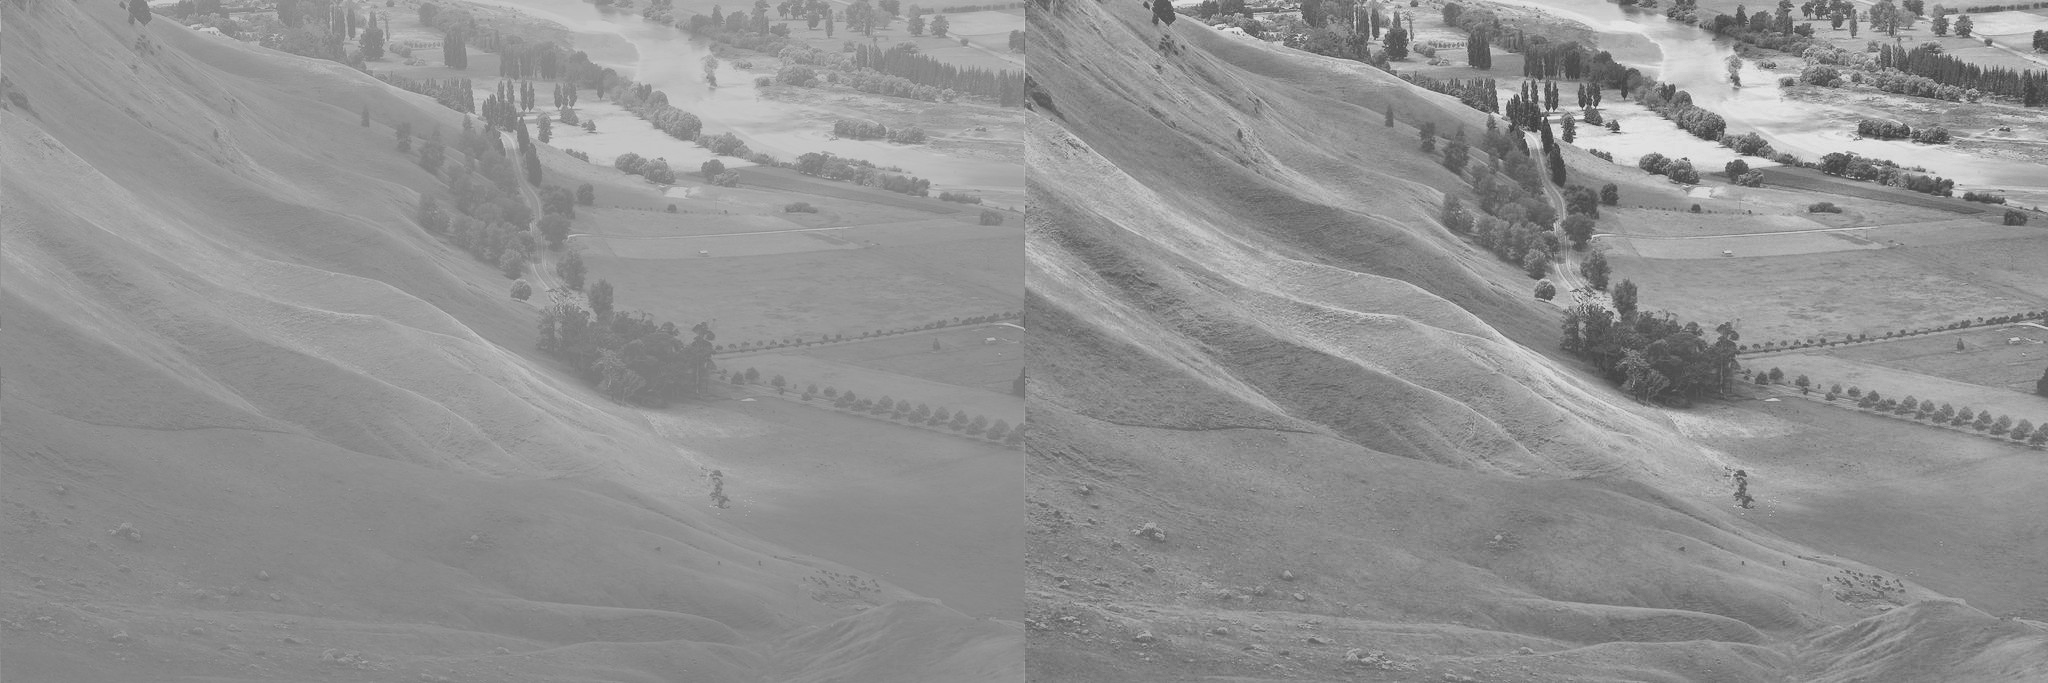

In [27]:
import numpy as np
import cv2

img = cv2.imread('/content/Unequalized_Hawkes_Bay_NZ.jpg',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

#cv2.imwrite('clahe_2.jpg',cl1)
res = np.hstack((img,cl1)) 
cv2_imshow(res)

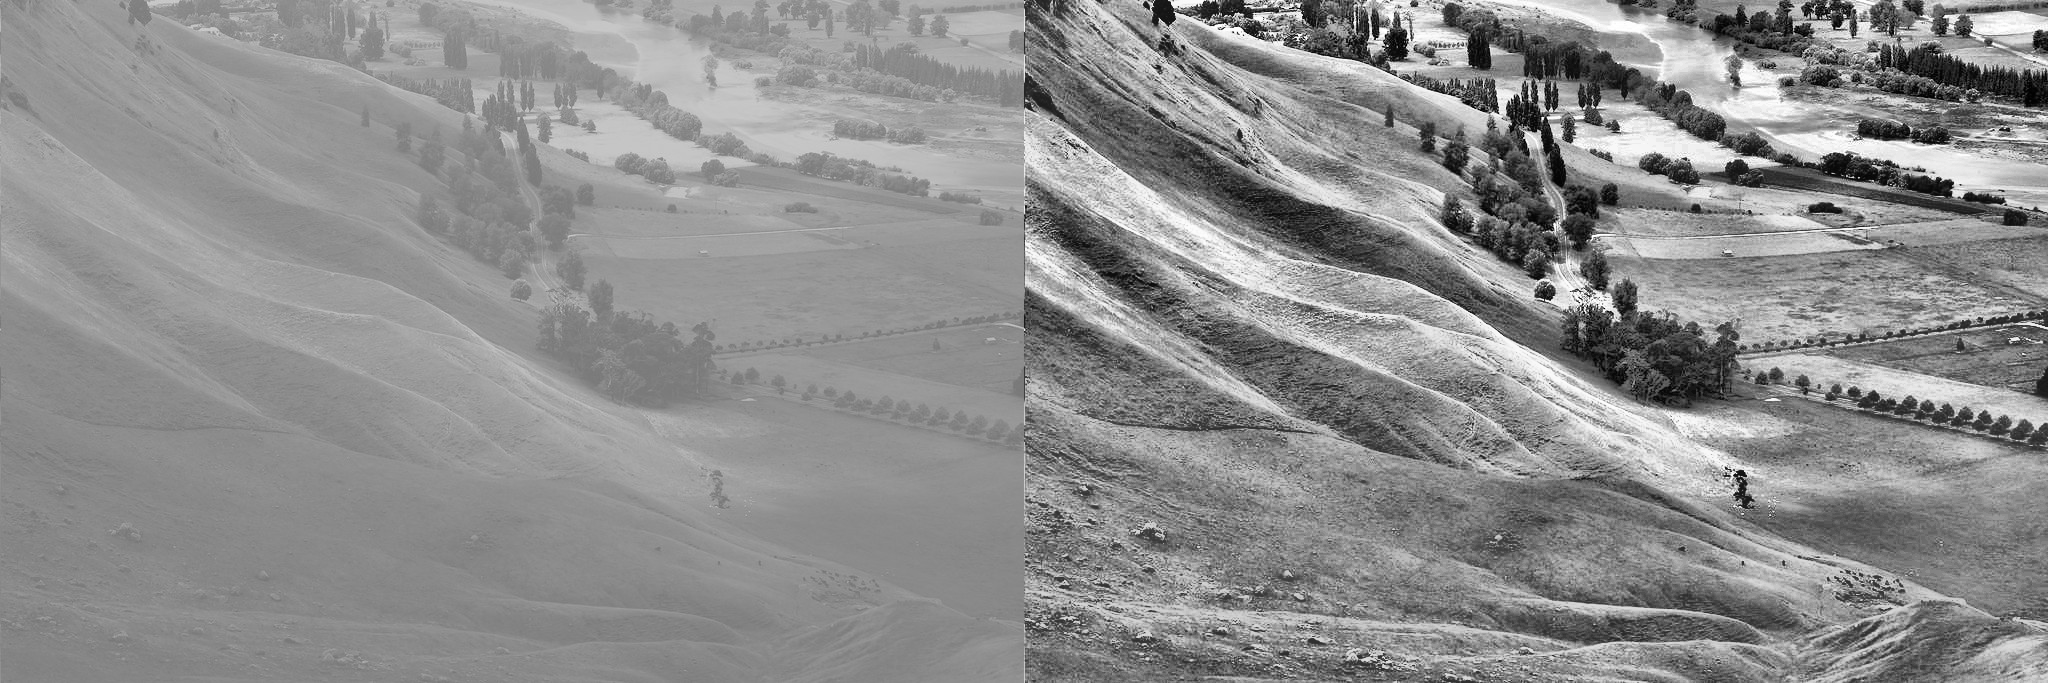

In [28]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

#cv2.imwrite('clahe_2.jpg',cl1)
res = np.hstack((img,cl1)) 
cv2_imshow(res)

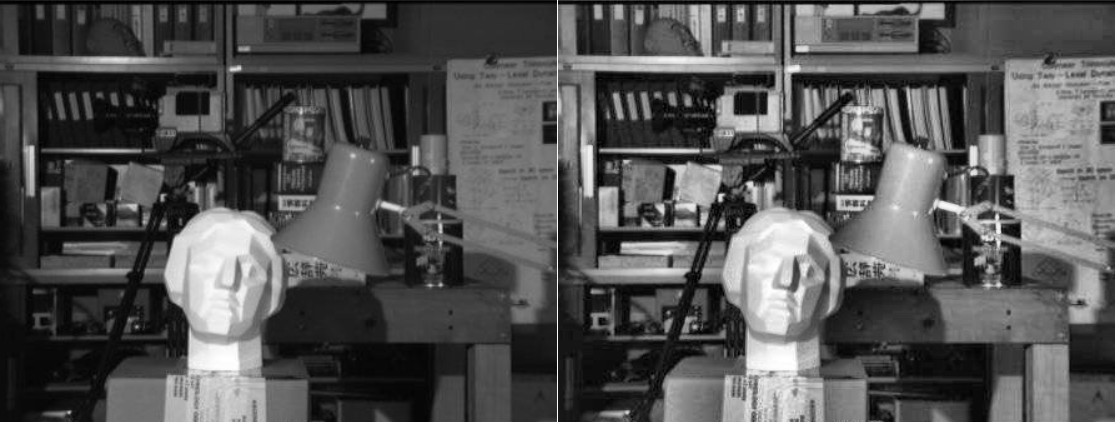

In [31]:
img = cv2.imread('/content/test.png',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

#cv2.imwrite('clahe_2.jpg',cl1)
res = np.hstack((img,cl1)) 
cv2_imshow(res)